In [1]:
import numpy as np
import torch as th
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from lib.datasets.mpii import MPII

In [3]:
ds = MPII('train', transform=None, get_heatmaps=True, scale_factor=0., rotation_factor=0., flip=False)

MPII, train mode=> load 22246 samples


In [4]:
ds[0]['img'].dtype

dtype('uint8')

In [5]:
y0 = th.zeros(16, 2)
size = 0
for i in range(len(ds)):
    if(th.all(ds[i]['joints_mask'])):
        print('\rProgress: %.2f%%' % (100 * i / len(ds)), end='')
        y0 += ds[i]['joints']
        size += 1
mean = y0 / size

Progress: 0.65%

TypeError: src data type = 17 is not supported

In [6]:
mean

NameError: name 'mean' is not defined

In [7]:
th.save(mean, 'initial_y0_values.txt')

NameError: name 'mean' is not defined

In [5]:
mean = th.load('initial_y0_values.txt')

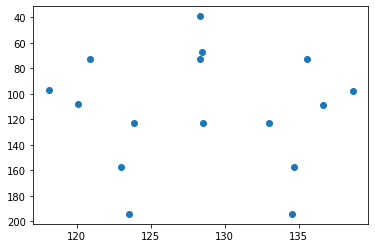

In [6]:
plt.scatter(mean[:,0], mean[:,1]).axes.invert_yaxis()

In [7]:
from lib.utils.generate_intermediate_yt import generate_intermediate_yt

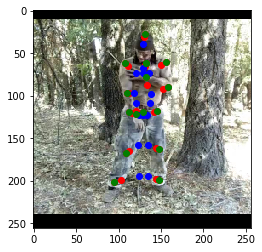

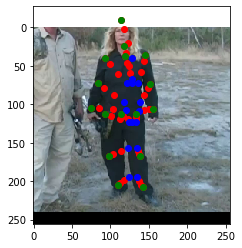

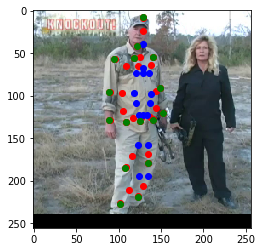

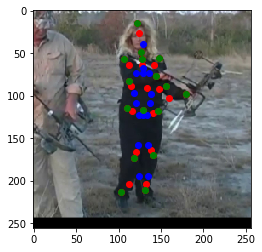

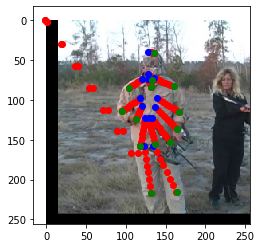

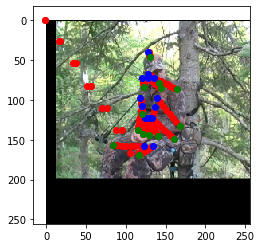

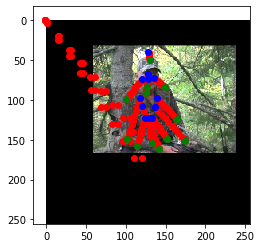

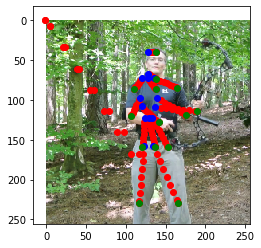

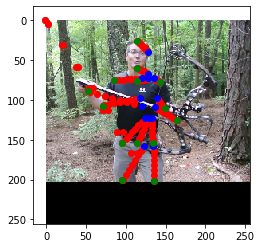

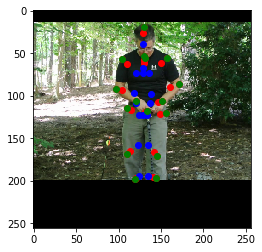

In [8]:
y0 = mean
L = 50

for idx in range(300, 310):
    image = ds[idx]['img']
    mask = ds[idx]['joints_mask']
    gd_joints = ds[idx]['joints']

    intermediate_values = generate_intermediate_yt(y0, gd_joints, mask, L)

    dot_nb = 16
    plt.imshow(image).axes.invert_yaxis()
    for val in intermediate_values:
        plt.scatter(val[:dot_nb,0], val[:dot_nb,1], c='red')

    plt.scatter(mean[mask][:dot_nb,0], mean[mask][:dot_nb,1], c='blue').axes.invert_yaxis()
    plt.scatter(gd_joints[mask][:dot_nb,0], gd_joints[mask][:dot_nb,1], c='green')
    plt.show()

In [52]:
def generate_intermediate_yt_new(y0, gt_joints, mask, L, step):
    dir = gt_joints - y0
    dir = dir / th.norm(dir)
    yt = y0
    
    for t in range(step):
        if(th.norm(gt_joints - yt) >= L):
            yt = yt + L * dir
        else:
            if(th.norm(gt_joints - yt) <= 0.01):
                return gt_joints
            yt = yt + th.norm(gt_joints - yt) * dir
    return yt

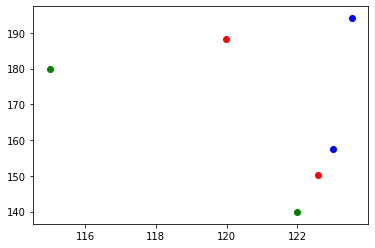

In [60]:
joint = th.tensor([[115,180], [122,140]])
mask = th.tensor([True, True])
step = 4

for t in range(1, step):
    yt = generate_intermediate_yt_new(mean[:2], joint, mask, 10, t)

    plt.scatter(yt[:,0], yt[:,1], c='red')
    plt.scatter(mean[:2][mask][:2,0], mean[:2][mask][:2,1], c='blue')
    plt.scatter(joint[mask][:,0], joint[mask][:,1], c='green')

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


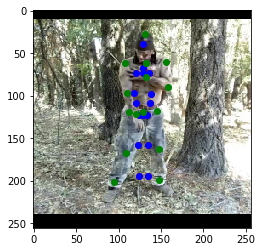

tensor([[102.7391, 199.6851],
        [112.5370, 165.0414],
        [115.5196, 119.9349],
        [142.1008, 119.6218],
        [144.2849, 161.6336],
        [143.9090, 197.6685],
        [128.8433, 119.9791],
        [131.1838,  64.4361],
        [131.2416,  63.3517],
        [130.1255,  31.0489],
        [120.2896, 117.8766],
        [112.5218,  97.3479],
        [111.5970,  64.7838],
        [150.3615,  63.6829],
        [152.6028,  91.5797],
        [133.5232,  86.9313]], dtype=torch.float64)


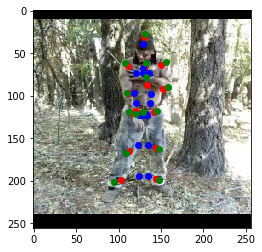

tensor([[ 94.5934, 201.8833],
        [108.4333, 167.9995],
        [112.2512, 118.8441],
        [145.6578, 118.3668],
        [148.0439, 163.2271],
        [147.5667, 199.0198],
        [128.9545, 118.8441],
        [132.2951,  61.0984],
        [132.3315,  61.9225],
        [130.8271,  27.8223],
        [120.3642, 121.7075],
        [110.3422,  97.3684],
        [107.9561,  61.5757],
        [156.1570,  60.1440],
        [158.0659,  89.2554],
        [132.2951,  78.2790]], dtype=torch.float64)


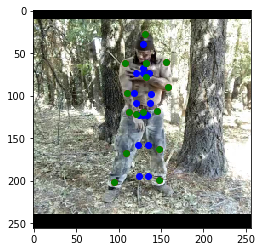

tensor([[ 94.5934, 201.8833],
        [108.4333, 167.9995],
        [112.2512, 118.8441],
        [145.6578, 118.3668],
        [148.0439, 163.2271],
        [147.5667, 199.0198],
        [128.9545, 118.8441],
        [132.2951,  61.0984],
        [132.3315,  61.9225],
        [130.8271,  27.8223],
        [120.3642, 121.7075],
        [110.3422,  97.3684],
        [107.9561,  61.5757],
        [156.1570,  60.1440],
        [158.0659,  89.2554],
        [132.2951,  78.2790]], dtype=torch.float64)


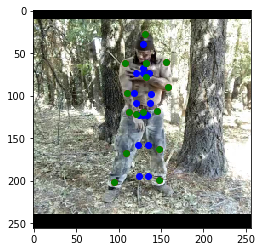

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


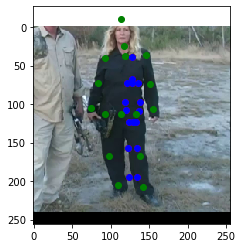

tensor([[118.0740, 198.2234],
        [113.3920, 161.3113],
        [112.1211, 119.1117],
        [132.8874, 119.1769],
        [135.9666, 161.1026],
        [137.4325, 199.3389],
        [122.7050, 119.2085],
        [124.8803,  59.4636],
        [124.3166,  50.4954],
        [122.6861,  20.4134],
        [102.8762, 106.7599],
        [104.7128,  87.7979],
        [110.2892,  60.2429],
        [139.3264,  58.5469],
        [143.5389,  88.4466],
        [143.5935, 107.8503]], dtype=torch.float64)


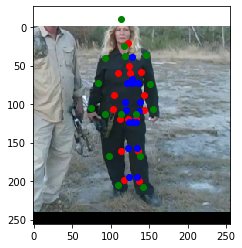

tensor([[112.6050, 202.3756],
        [103.7662, 165.1360],
        [100.3751, 115.5024],
        [132.7583, 115.5271],
        [137.2488, 164.6413],
        [140.2978, 204.4605],
        [116.8505, 115.5390],
        [121.4151,  45.9666],
        [120.1753,  33.9888],
        [117.0385,   1.5372],
        [ 85.6534, 105.4274],
        [ 91.3374,  78.3002],
        [ 99.6826,  47.5087],
        [143.0928,  44.3727],
        [148.4276,  79.3770],
        [150.5273, 106.6712]], dtype=torch.float64)


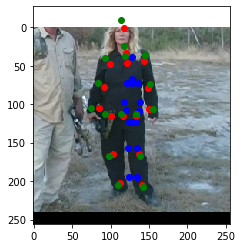

tensor([[109.2807, 204.8994],
        [ 97.9154, 167.4608],
        [ 93.2356, 113.3085],
        [132.6798, 113.3085],
        [138.0282, 166.7923],
        [142.0395, 207.5736],
        [113.2920, 113.3085],
        [119.3089,  37.7628],
        [117.6581,  23.9556],
        [113.6057,  -9.9363],
        [ 75.1848, 104.6174],
        [ 83.2074,  72.5272],
        [ 93.2356,  39.7684],
        [145.3822,  35.7571],
        [151.3991,  73.8643],
        [154.7419, 105.9545]], dtype=torch.float64)


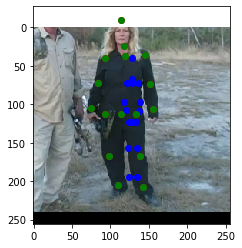

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


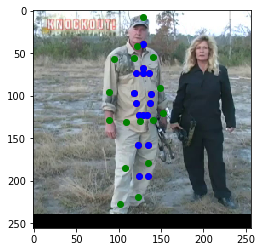

tensor([[112.7677, 210.4502],
        [115.7363, 170.9447],
        [116.4410, 126.7048],
        [136.5040, 125.4099],
        [134.3901, 168.2863],
        [128.6643, 206.2082],
        [126.6676, 126.2455],
        [123.3205,  64.5352],
        [124.8999,  54.2560],
        [128.2678,  23.7674],
        [105.0688, 118.1359],
        [103.7695,  96.4200],
        [108.1748,  65.0833],
        [138.0760,  63.6033],
        [143.7052,  94.3745],
        [144.3049, 114.5686]], dtype=torch.float64)


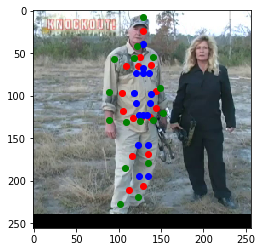

tensor([[101.9924, 226.8292],
        [108.4550, 184.4028],
        [109.0149, 130.6885],
        [139.9915, 127.9930],
        [134.0959, 179.0087],
        [122.7615, 218.1991],
        [124.7758, 129.6131],
        [118.2955,  56.1099],
        [121.3417,  41.5100],
        [128.2020,   8.2452],
        [ 90.0386, 128.1794],
        [ 89.4508,  95.5445],
        [ 95.4537,  57.1895],
        [140.5921,  54.4853],
        [148.7601,  91.2330],
        [151.9500, 120.1078]], dtype=torch.float64)


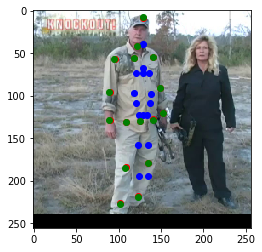

tensor([[101.4630, 227.6339],
        [108.0972, 185.0640],
        [108.6501, 130.8842],
        [140.1628, 128.1199],
        [134.0814, 179.5355],
        [122.4714, 218.7882],
        [124.6829, 129.7785],
        [118.0486,  55.6959],
        [121.1669,  40.8838],
        [128.1988,   7.4826],
        [ 89.3001, 128.6728],
        [ 88.7473,  95.5015],
        [ 94.8287,  56.8016],
        [140.7157,  54.0374],
        [149.0085,  91.0786],
        [152.3256, 120.3800]], dtype=torch.float64)


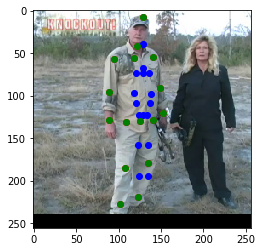

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


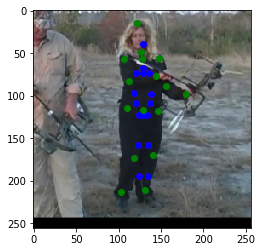

tensor([[112.4080, 204.4268],
        [120.1637, 165.9867],
        [116.1502, 118.3749],
        [140.6470, 120.0210],
        [137.8010, 164.0235],
        [132.5534, 203.6934],
        [128.6513, 119.2448],
        [127.7559,  64.0160],
        [127.1548,  56.8386],
        [124.4061,  25.7886],
        [133.2361,  91.0131],
        [115.1483,  88.9521],
        [112.8152,  64.0234],
        [142.1911,  63.5086],
        [147.9772,  92.6478],
        [159.8689, 103.0232]], dtype=torch.float64)


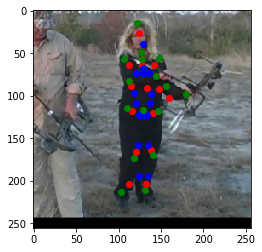

tensor([[103.2986, 212.8985],
        [117.8288, 172.9404],
        [109.8372, 114.8195],
        [146.8893, 117.7256],
        [140.3507, 169.3079],
        [130.9060, 211.4455],
        [128.7265, 116.2725],
        [127.2735,  56.6986],
        [126.0888,  48.5242],
        [121.1931,  14.7438],
        [143.9832,  77.0409],
        [112.7433,  82.1265],
        [106.2047,  56.6986],
        [147.6158,  55.9721],
        [155.6074,  88.6651],
        [178.8558,  98.1098]], dtype=torch.float64)


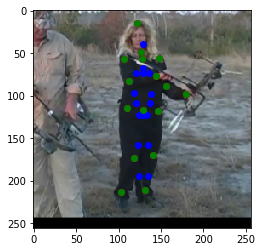

tensor([[103.2986, 212.8985],
        [117.8288, 172.9404],
        [109.8372, 114.8195],
        [146.8893, 117.7256],
        [140.3507, 169.3079],
        [130.9060, 211.4455],
        [128.7265, 116.2725],
        [127.2735,  56.6986],
        [126.0888,  48.5242],
        [121.1931,  14.7438],
        [143.9832,  77.0409],
        [112.7433,  82.1265],
        [106.2047,  56.6986],
        [147.6158,  55.9721],
        [155.6074,  88.6651],
        [178.8558,  98.1098]], dtype=torch.float64)


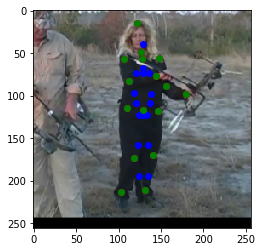

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


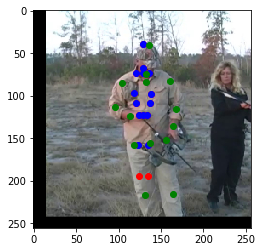

tensor([[106.0598, 166.6872],
        [124.1985, 165.8735],
        [123.0833, 127.6442],
        [136.2436, 127.0130],
        [138.8006, 165.7795],
        [115.5363, 166.8128],
        [129.7646, 127.4582],
        [128.8587,  74.4389],
        [129.0503,  68.0949],
        [129.3150,  39.4956],
        [119.1221, 110.2552],
        [114.9064,  99.6100],
        [118.5234,  74.6136],
        [138.9917,  74.0727],
        [142.6911, 100.0403],
        [140.4987, 112.8257]], dtype=torch.float64)


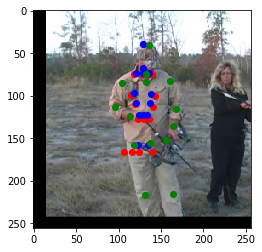

tensor([[ 88.5765, 139.3032],
        [125.3793, 174.2604],
        [122.2995, 132.5673],
        [139.4708, 131.1993],
        [142.9169, 173.9951],
        [ 96.5054, 139.4083],
        [130.9698, 132.0384],
        [129.3718,  75.9172],
        [129.6427,  69.1879],
        [130.2964,  39.7016],
        [118.1452, 112.4180],
        [111.7246, 101.9246],
        [116.1509,  76.2501],
        [142.4234,  75.4242],
        [146.7321, 102.5646],
        [144.3376, 116.6221]], dtype=torch.float64)


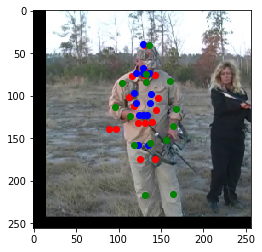

tensor([[ 71.0932, 111.9192],
        [126.5601, 182.6473],
        [121.5158, 137.4905],
        [142.6979, 135.3855],
        [147.0332, 182.2107],
        [ 77.4746, 112.0038],
        [132.1750, 136.6186],
        [129.8849,  77.3956],
        [130.2351,  70.2809],
        [131.2778,  39.9076],
        [117.1683, 114.5808],
        [108.5428, 104.2391],
        [113.7784,  77.8866],
        [145.8551,  76.7756],
        [150.7730, 105.0888],
        [148.1766, 120.4185]], dtype=torch.float64)


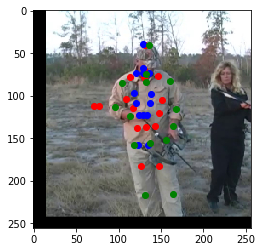

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


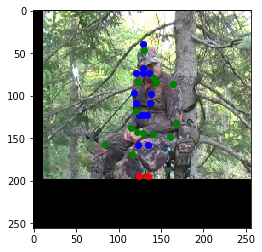

tensor([[105.6425, 166.0336],
        [117.4069, 157.4268],
        [123.5150, 125.5295],
        [136.9076, 126.5661],
        [132.0088, 159.1487],
        [115.0821, 166.1588],
        [130.3121, 126.1369],
        [130.5428,  74.7019],
        [130.3166,  68.6661],
        [128.6082,  40.2997],
        [119.3424, 112.4121],
        [118.5076, 100.2697],
        [121.2073,  74.4796],
        [139.6768,  74.6744],
        [142.7960, 102.5281],
        [135.5924, 113.9831]], dtype=torch.float64)


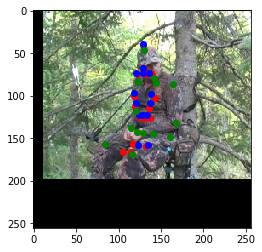

tensor([[ 87.7420, 137.9961],
        [111.7960, 157.3671],
        [123.1629, 128.3379],
        [140.7988, 130.3054],
        [129.3333, 160.7335],
        [ 95.5971, 138.1003],
        [132.0647, 129.3958],
        [132.7401,  76.4433],
        [132.1752,  70.3303],
        [128.8828,  41.3099],
        [118.5858, 116.7318],
        [118.9270, 103.2438],
        [121.5189,  75.9821],
        [143.7937,  76.6275],
        [146.9417, 107.5401],
        [134.5252, 118.9368]], dtype=torch.float64)


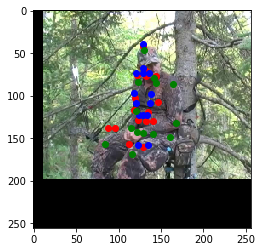

tensor([[ 69.8414, 109.9586],
        [106.1852, 157.3074],
        [122.8109, 131.1463],
        [144.6899, 134.0448],
        [126.6578, 162.3184],
        [ 76.1121, 110.0417],
        [133.8173, 132.6547],
        [134.9374,  78.1847],
        [134.0338,  71.9945],
        [129.1574,  42.3202],
        [117.8293, 121.0515],
        [119.3464, 106.2180],
        [121.8304,  77.4846],
        [147.9106,  78.5807],
        [151.0875, 112.5521],
        [133.4579, 123.8905]], dtype=torch.float64)


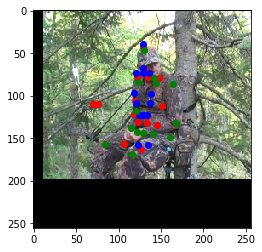

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


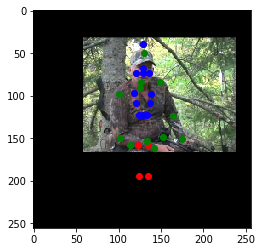

tensor([[109.9675, 172.8079],
        [109.4994, 140.2111],
        [122.7938, 126.5286],
        [135.0905, 125.6782],
        [119.8944, 140.2800],
        [119.7899, 172.9381],
        [129.0470, 126.2113],
        [128.0031,  74.9391],
        [128.1991,  68.8407],
        [128.5367,  40.4555],
        [122.4535, 113.8603],
        [116.2735, 102.9908],
        [118.7141,  75.7463],
        [137.0520,  73.9335],
        [141.4206, 100.3836],
        [140.8355, 113.6589]], dtype=torch.float64)


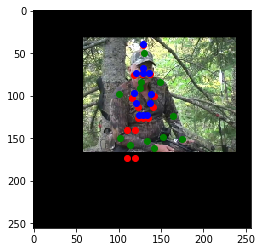

tensor([[ 96.3920, 151.5446],
        [ 95.9812, 122.9356],
        [121.7206, 130.3362],
        [137.1645, 128.5295],
        [105.1044, 122.9961],
        [105.0128, 151.6589],
        [129.5346, 129.5447],
        [127.6607,  76.9178],
        [127.9403,  70.6795],
        [128.7397,  41.6216],
        [124.8080, 119.6281],
        [114.4588, 108.6861],
        [116.5325,  78.5154],
        [138.5440,  75.1459],
        [144.1909, 103.2512],
        [145.0114, 118.2885]], dtype=torch.float64)


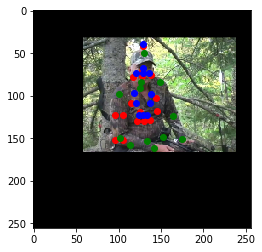

tensor([[ 82.8165, 130.2813],
        [ 82.4629, 105.6601],
        [120.6473, 134.1438],
        [139.2385, 131.3808],
        [ 90.3145, 105.7122],
        [ 90.2356, 130.3797],
        [130.0221, 132.8780],
        [127.3183,  78.8964],
        [127.6814,  72.5183],
        [128.9428,  42.7876],
        [127.1625, 125.3959],
        [112.6441, 114.3813],
        [114.3508,  81.2846],
        [140.0360,  76.3582],
        [146.9613, 106.1187],
        [149.1872, 122.9180]], dtype=torch.float64)


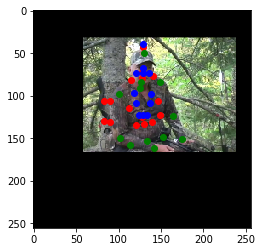

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


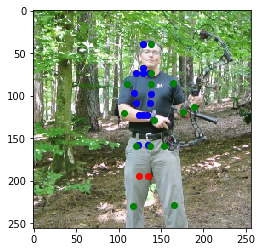

tensor([[106.5114, 167.3946],
        [122.1838, 167.3144],
        [123.4726, 127.7570],
        [135.7650, 127.7978],
        [138.8716, 167.3307],
        [116.0279, 167.5208],
        [129.7457, 127.8925],
        [129.6115,  74.6997],
        [129.7294,  67.9247],
        [129.6815,  39.3346],
        [122.9978, 110.8357],
        [116.5142, 100.4041],
        [119.4429,  74.8150],
        [139.5264,  74.3415],
        [143.7599, 100.4935],
        [143.8094, 109.6746]], dtype=torch.float64)


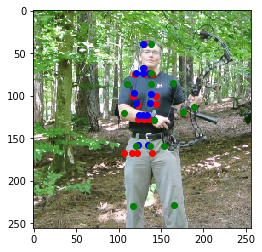

tensor([[ 89.4798, 140.7181],
        [121.3499, 177.1422],
        [123.0781, 132.7930],
        [138.5136, 132.7688],
        [143.0589, 177.0974],
        [ 97.4887, 140.8243],
        [130.9319, 132.9070],
        [130.8775,  76.4388],
        [131.0007,  68.8475],
        [131.0293,  39.3797],
        [125.8966, 113.5789],
        [114.9401, 103.5127],
        [117.9900,  76.6529],
        [143.4930,  75.9619],
        [148.8696, 103.4709],
        [150.9591, 110.3199]], dtype=torch.float64)


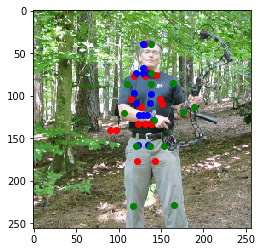

tensor([[ 72.4482, 114.0415],
        [120.5160, 186.9701],
        [122.6836, 137.8290],
        [141.2622, 137.7399],
        [147.2462, 186.8642],
        [ 78.9495, 114.1277],
        [132.1181, 137.9216],
        [132.1435,  78.1780],
        [132.2721,  69.7703],
        [132.3771,  39.4248],
        [128.7954, 116.3222],
        [113.3661, 106.6212],
        [116.5371,  78.4908],
        [147.4595,  77.5822],
        [153.9793, 106.4483],
        [158.1088, 110.9652]], dtype=torch.float64)


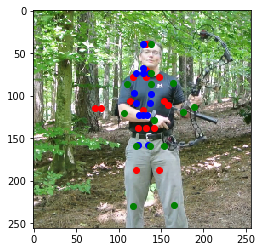

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


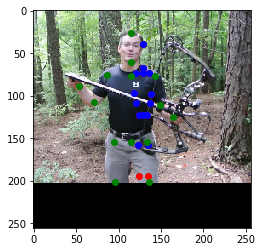

tensor([[106.2181, 166.9351],
        [119.1598, 163.5436],
        [119.8511, 127.1071],
        [133.1170, 127.1583],
        [134.8723, 163.6501],
        [115.7086, 167.0610],
        [126.6054, 127.2423],
        [126.4212,  73.4104],
        [126.5180,  66.0052],
        [126.4110,  37.3973],
        [110.7788, 105.4515],
        [111.6027,  98.6716],
        [116.0157,  73.2650],
        [136.6241,  73.3640],
        [140.1228,  99.3405],
        [140.5250, 111.2881]], dtype=torch.float64)


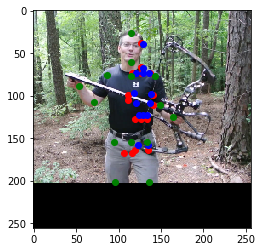

tensor([[ 88.8931, 139.7991],
        [115.3020, 169.6006],
        [115.8352, 131.4933],
        [133.2176, 131.4898],
        [135.0602, 169.7362],
        [ 96.8501, 139.9046],
        [124.6513, 131.6066],
        [124.4969,  73.8602],
        [124.5780,  65.0084],
        [124.4883,  35.5050],
        [101.4586, 102.8107],
        [105.1171, 100.0476],
        [111.1357,  73.5528],
        [137.6882,  74.0068],
        [141.5954, 101.1649],
        [144.3902, 113.5469]], dtype=torch.float64)


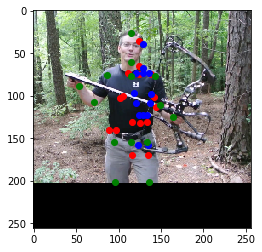

tensor([[ 71.5681, 112.6631],
        [111.4441, 175.6576],
        [111.8192, 135.8794],
        [133.3182, 135.8213],
        [135.2481, 175.8224],
        [ 77.9916, 112.7482],
        [122.6972, 135.9709],
        [122.5725,  74.3100],
        [122.6381,  64.0117],
        [122.5656,  33.6127],
        [ 92.1385, 100.1698],
        [ 98.6316, 101.4237],
        [106.2556,  73.8407],
        [138.7523,  74.6496],
        [143.0680, 102.9893],
        [148.2555, 115.8057]], dtype=torch.float64)


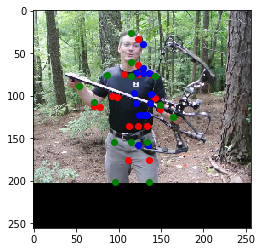

tensor([[123.5431, 194.0712],
        [123.0177, 157.4866],
        [123.8671, 122.7210],
        [133.0165, 122.8268],
        [134.6844, 157.5639],
        [134.5671, 194.2173],
        [128.5594, 122.8780],
        [128.3455,  72.9605],
        [128.4580,  67.0019],
        [128.3336,  39.2895],
        [120.0990, 108.0924],
        [118.0882,  97.2955],
        [120.8958,  72.9771],
        [135.5599,  72.7212],
        [138.6502,  97.5161],
        [136.6597, 109.0293]])


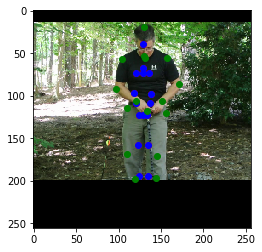

tensor([[120.8544, 196.9628],
        [114.0209, 164.5665],
        [114.3095, 117.0893],
        [148.4751, 121.3913],
        [141.8749, 166.6405],
        [140.8112, 195.9886],
        [131.4323, 119.3610],
        [129.8238,  61.7867],
        [129.8034,  57.9694],
        [129.0252,  26.0299],
        [120.3667, 106.4874],
        [103.8138,  93.6041],
        [109.7164,  62.3043],
        [149.6806,  61.1934],
        [160.1159,  90.0956],
        [146.4709, 107.4884]], dtype=torch.float64)


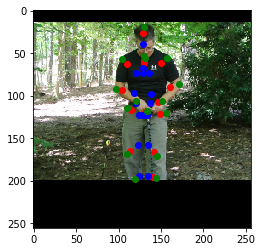

tensor([[119.4706, 198.4511],
        [109.3904, 168.2104],
        [109.3904, 114.1908],
        [156.4314, 120.6525],
        [145.5758, 171.3121],
        [144.0250, 196.9003],
        [132.9109, 117.5509],
        [130.5847,  56.0357],
        [130.4959,  53.3205],
        [129.3811,  19.2054],
        [120.5045, 105.6614],
        [ 96.4670,  91.7042],
        [103.9626,  56.8111],
        [156.9483,  55.2603],
        [171.1640,  86.2763],
        [151.5205, 106.6953]], dtype=torch.float64)


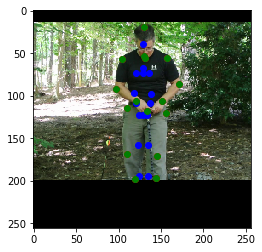

tensor([[119.4706, 198.4511],
        [109.3904, 168.2104],
        [109.3904, 114.1908],
        [156.4314, 120.6525],
        [145.5758, 171.3121],
        [144.0250, 196.9003],
        [132.9109, 117.5509],
        [130.5847,  56.0357],
        [130.4959,  53.3205],
        [129.3811,  19.2054],
        [120.5045, 105.6614],
        [ 96.4670,  91.7042],
        [103.9626,  56.8111],
        [156.9483,  55.2603],
        [171.1640,  86.2763],
        [151.5205, 106.6953]], dtype=torch.float64)


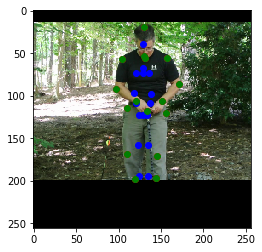

In [10]:
y0 = mean
L = 50
step = 4

for idx in range(300, 310):
    image = ds[idx]['img']
    mask = ds[idx]['joints_mask']
    gd_joints = ds[idx]['joints']

    for t in range(step):
        intermediate_values = generate_intermediate_yt_new(y0, gd_joints, mask, L, t)
        print(intermediate_values)

        dot_nb = 16
        plt.imshow(image).axes.invert_yaxis()
        plt.scatter(intermediate_values[:dot_nb,0], intermediate_values[:dot_nb,1], c='red')

        plt.scatter(mean[mask][:dot_nb,0], mean[mask][:dot_nb,1], c='blue').axes.invert_yaxis()
        plt.scatter(gd_joints[mask][:dot_nb,0], gd_joints[mask][:dot_nb,1], c='green')
        plt.show()